In [202]:
import os, glob
import collections
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
with open('../advent-of-code21.cabal') as f:
    build_depends = [l for l in f.readlines() if 'build-depends' in l]
build_depends

['  build-depends:       base >=4.15\n',
 '  build-depends:       base >=4.15\n',
 '  -- build-depends:       base >=4.13 && < 4.15\n',
 '  build-depends: text, attoparsec\n',
 '  build-depends: text, attoparsec\n',
 '  build-depends: text, attoparsec, linear, containers\n',
 '  build-depends: split, containers\n',
 '  build-depends: split\n',
 '  build-depends: text, attoparsec, containers\n',
 '  build-depends: text, attoparsec, containers\n',
 '  build-depends: array, containers, linear\n',
 '  build-depends: containers\n',
 '  build-depends: array, containers, linear\n',
 '  build-depends: text, attoparsec, containers\n',
 '  build-depends: text, attoparsec, containers, linear\n',
 '  build-depends: text, attoparsec, containers, multiset\n',
 '  build-depends: containers, linear, array, pqueue, mtl, lens\n',
 '  build-depends: text, containers, linear, array, pqueue, mtl, lens\n',
 '  build-depends: text, containers, linear, array, pqueue, mtl, lens\n',
 '  build-depends: binary, b

In [204]:
cabal_file = open('../advent-of-code21.cabal').read()
executables = cabal_file.split('executable')[2:]
executables[:3]

[' advent01\n  import: common-extensions, build-directives\n  main-is:             advent01/Main.hs\n  -- other-modules:\n  -- other-extensions:\n  -- build-depends:       base >=4.13 && < 4.15\n  -- hs-source-dirs:\n  -- default-language:    Haskell2010\n\n',
 ' advent02\n  import: common-extensions, build-directives\n  main-is:             advent02/Main.hs\n  build-depends: text, attoparsec\n\n',
 ' advent03\n  import: common-extensions, build-directives\n  main-is: advent03/Main.hs\n\n']

In [205]:
e = executables[1]
e.strip().split('build-depends: ')[1].split(',')

['text', ' attoparsec']

In [206]:
def extract(line):
    parts = line.strip().split('build-depends: ')
    name = parts[0].split()[0]
    if len(parts) > 1:
        depends = [p.strip() for p in parts[1].split('\n')[0].split(',') if 'base' not in p]
    else:
        depends = []
    return name, depends       

In [207]:
modules = {e: ms for e, ms in [extract(e) for e in executables] if e.endswith(tuple(str(i) for i in range(10)))}
modules

{'advent01': [],
 'advent02': ['text', 'attoparsec'],
 'advent03': [],
 'advent04': ['text', 'attoparsec'],
 'advent05': ['text', 'attoparsec', 'linear', 'containers'],
 'advent06': ['split', 'containers'],
 'advent07': ['split'],
 'advent08': ['text', 'attoparsec', 'containers'],
 'advent09': ['array', 'containers', 'linear'],
 'advent10': ['containers'],
 'advent11': ['array', 'containers', 'linear'],
 'advent12': ['text', 'attoparsec', 'containers'],
 'advent13': ['text', 'attoparsec', 'containers', 'linear'],
 'advent14': ['text', 'attoparsec', 'containers', 'multiset'],
 'advent15': ['containers', 'linear', 'array', 'pqueue', 'mtl', 'lens'],
 'advent16': ['binary', 'bytestring', 'bitstream', 'mtl'],
 'advent17': ['linear', 'text', 'attoparsec', 'lens'],
 'advent18': ['text', 'attoparsec'],
 'advent19': ['linear', 'text', 'attoparsec', 'containers', 'multiset'],
 'advent20': ['linear', 'mtl', 'containers'],
 'advent21': ['text', 'attoparsec', 'containers', 'multiset'],
 'advent22':

In [208]:
all_modules = set(m for p in modules for m in modules[p])
modules_df = pd.DataFrame.from_dict({p: {m: m in modules[p] for m in sorted(all_modules)} for p in modules}, orient='index').sort_index()
modules_df

array  attoparsec  binary  bitstream  bytestring  containers   lens  \
advent01  False       False   False      False       False       False  False   
advent02  False        True   False      False       False       False  False   
advent03  False       False   False      False       False       False  False   
advent04  False        True   False      False       False       False  False   
advent05  False        True   False      False       False        True  False   
advent06  False       False   False      False       False        True  False   
advent07  False       False   False      False       False       False  False   
advent08  False        True   False      False       False        True  False   
advent09   True       False   False      False       False        True  False   
advent10  False       False   False      False       False        True  False   
advent11   True       False   False      False       False        True  False   
advent12  False        True   False      False       False        True  False   
advent13  False        True   False      False       False        True  False   
advent14  False        True   False      False       False        True  False   
advent15   True       False   False      False       False        True   True   
advent16  False       False    True       True        True       False  False   
advent17  False        True   False      False       False       False   True   
advent18  False        True   False      False       False       False  False   
advent19  False        True   False      False       False        True  False   
advent20  False       False   False      False       False        True  False   
advent21  False        True   False      False       False        True  False   
advent22  False        True   False      False       False        True   True   
advent23  False       False   False      False       False        True   True   
advent24  False        True   False      False       False        True  False   
advent25  False       False   False      False       False        True  False   

          linear    mtl  multiset  pqueue  split   text  
advent01   False  False     False   False  False  False  
advent02   False  False     False   False  False   True  
advent03   False  False     False   False  False  False  
advent04   False  False     False   False  False   True  
advent05    True  False     False   False  False   True  
advent06   False  False     False   False   True  False  
advent07   False  False     False   False   True  False  
advent08   False  False     False   False  False   True  
advent09    True  False     False   False  False  False  
advent10   False  False     False   False  False  False  
advent11    True  False     False   False  False  False  
advent12   False  False     False   False  False   True  
advent13    True  False     False   False  False   True  
advent14   False  False      True   False  False   True  
advent15    True   True     False    True  False  False  
advent16   False   True     False   False  False  False  
advent17    True  False     False   False  False   True  
advent18   False  False     False   False  False   True  
advent19    True  False      True   False  False   True  
advent20    True   True     False   False  False  False  
advent21   False  False      True   False  False   True  
advent22    True  False     False   False  False   True  
advent23    True   True     False    True  False  False  
advent24   False  False     False   False  False   True  
advent25    True  False     False   False  False  False

In [209]:
print(modules_df.sum().sort_values(ascending=False).to_markdown())

|            |   0 |
|:-----------|----:|
| containers |  17 |
| attoparsec |  13 |
| text       |  13 |
| linear     |  11 |
| lens       |   4 |
| mtl        |   4 |
| array      |   3 |
| multiset   |   3 |
| pqueue     |   2 |
| split      |   2 |
| binary     |   1 |
| bitstream  |   1 |
| bytestring |   1 |


In [210]:
modules_scatter = modules_df.stack().reset_index()
modules_scatter.columns = ['program', 'module', 'present']
modules_scatter = modules_scatter[modules_scatter.present]
modules_scatter

program      module  present
14   advent02  attoparsec     True
25   advent02        text     True
40   advent04  attoparsec     True
51   advent04        text     True
53   advent05  attoparsec     True
..        ...         ...      ...
300  advent24  attoparsec     True
304  advent24  containers     True
311  advent24        text     True
317  advent25  containers     True
319  advent25      linear     True

[75 rows x 3 columns]

In [211]:
modules_scatter.plot.scatter(x='program', y='module', s=80, rot=45, figsize=(10, 6))

<AxesSubplot:xlabel='program', ylabel='module'>

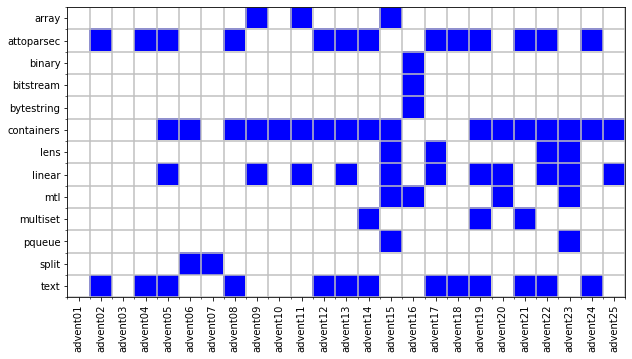

In [212]:
cmap = mpl.colors.ListedColormap(['white', 'blue'])

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(modules_df.to_numpy().T, cmap=cmap)
plt.xticks(range(modules_df.index.size), labels=modules_df.index.values, rotation=90);
plt.yticks(range(modules_df.columns.size), labels=modules_df.columns.values);

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.grid(which='minor', axis='both', linestyle='-', color='silver', linewidth=1.5);
plt.savefig('packages.png');

In [213]:
mains = list(sorted(f for f in glob.glob('../advent*/Main.hs')))
mains

['../advent01/Main.hs',
 '../advent02/Main.hs',
 '../advent03/Main.hs',
 '../advent04/Main.hs',
 '../advent05/Main.hs',
 '../advent06/Main.hs',
 '../advent07/Main.hs',
 '../advent08/Main.hs',
 '../advent09/Main.hs',
 '../advent10/Main.hs',
 '../advent11/Main.hs',
 '../advent12/Main.hs',
 '../advent13/Main.hs',
 '../advent14/Main.hs',
 '../advent15/Main.hs',
 '../advent16/Main.hs',
 '../advent17/Main.hs',
 '../advent18/Main.hs',
 '../advent19/Main.hs',
 '../advent20/Main.hs',
 '../advent21/Main.hs',
 '../advent22/Main.hs',
 '../advent23/Main.hs',
 '../advent24/Main.hs',
 '../advent25/Main.hs']

In [214]:
main_imports = {}

for m in mains:
    with open(m) as f:
        lines = f.readlines()
        import_lines = [l for l in lines if l.strip().startswith('import') if 'Debug.Trace' not in l]
        imports = []
        for i in import_lines:
            words = i.strip().split()
            if 'qualified' in i:
                imports.append((words[2], True))
            else:
                imports.append((words[1], False))
    main_imports[m.split('/')[1]] = imports

main_imports

{'advent01': [('Data.List', False)],
 'advent02': [('Data.Text', False),
  ('Data.Text.IO', True),
  ('Data.Attoparsec.Text', False),
  ('Control.Applicative', False)],
 'advent03': [('Data.List', False), ('Data.Char', False)],
 'advent04': [('Data.Text', False),
  ('Data.Text.IO', True),
  ('Data.Attoparsec.Text', False),
  ('Control.Applicative', False),
  ('Data.List', False)],
 'advent05': [('Data.Text', False),
  ('Data.Text.IO', True),
  ('Data.Attoparsec.Text', False),
  ('Control.Applicative', False),
  ('Data.Map.Strict', True),
  ('Linear', False)],
 'advent06': [('Data.List', False),
  ('Data.List.Split', False),
  ('Data.IntMap.Strict', True)],
 'advent07': [('Data.List.Split', False)],
 'advent08': [('Data.Text', False),
  ('Data.Text.IO', True),
  ('Data.Attoparsec.Text', False),
  ('Data.List', False),
  ('Data.Map.Strict', True),
  ('Data.Map.Strict', False),
  ('Data.Set', True)],
 'advent09': [('Data.Array', False),
  ('Data.Char', False),
  ('Data.List', False),
  ('

In [215]:
import_counts = collections.Counter(l for ls in main_imports.values() for l in ls)
import_counts.most_common()

[(('Data.List', False), 16),
 (('Data.Text', False), 13),
 (('Data.Text.IO', True), 13),
 (('Data.Attoparsec.Text', False), 13),
 (('Linear', False), 11),
 (('Control.Applicative', False), 9),
 (('Data.Map.Strict', True), 9),
 (('Data.Set', True), 9),
 (('Data.Map.Strict', False), 7),
 (('Data.Char', False), 6),
 (('Data.Maybe', False), 5),
 (('Control.Lens', False), 4),
 (('Data.MultiSet', True), 3),
 (('Control.Monad.Reader', False), 3),
 (('Data.List.Split', False), 2),
 (('Data.Set', False), 2),
 (('Data.Array.IArray', False), 2),
 (('Data.PQueue.Prio.Min', True), 2),
 (('Data.Sequence', True), 2),
 (('Data.Sequence', False), 2),
 (('Data.Foldable', False), 2),
 (('Control.Monad.State.Strict', False), 2),
 (('Data.Ix', False), 2),
 (('Control.Monad', False), 2),
 (('Data.IntMap.Strict', True), 1),
 (('Data.Array', False), 1),
 (('Data.Tuple', False), 1),
 (('Data.Word', False), 1),
 (('Data.Bits', False), 1),
 (('Data.Int', False), 1),
 (('Data.ByteString', True), 1),
 (('Data.Bits

In [216]:
main_imports_unqualified = {m: set(i[0] for i in main_imports[m]) for m in main_imports}
main_imports_unqualified

{'advent01': {'Data.List'},
 'advent02': {'Control.Applicative',
  'Data.Attoparsec.Text',
  'Data.Text',
  'Data.Text.IO'},
 'advent03': {'Data.Char', 'Data.List'},
 'advent04': {'Control.Applicative',
  'Data.Attoparsec.Text',
  'Data.List',
  'Data.Text',
  'Data.Text.IO'},
 'advent05': {'Control.Applicative',
  'Data.Attoparsec.Text',
  'Data.Map.Strict',
  'Data.Text',
  'Data.Text.IO',
  'Linear'},
 'advent06': {'Data.IntMap.Strict', 'Data.List', 'Data.List.Split'},
 'advent07': {'Data.List.Split'},
 'advent08': {'Data.Attoparsec.Text',
  'Data.List',
  'Data.Map.Strict',
  'Data.Set',
  'Data.Text',
  'Data.Text.IO'},
 'advent09': {'Data.Array', 'Data.Char', 'Data.List', 'Data.Set', 'Linear'},
 'advent10': {'Data.List', 'Data.Map.Strict'},
 'advent11': {'Data.Array.IArray', 'Data.Char', 'Linear'},
 'advent12': {'Data.Attoparsec.Text',
  'Data.Char',
  'Data.Map.Strict',
  'Data.Set',
  'Data.Text',
  'Data.Text.IO',
  'Data.Tuple'},
 'advent13': {'Control.Applicative',
  'Data.A

In [217]:
import_counts_unqualified = collections.Counter(l for ls in main_imports_unqualified.values() for l in ls)
import_counts_unqualified.most_common()

[('Data.List', 16),
 ('Data.Text', 13),
 ('Data.Attoparsec.Text', 13),
 ('Data.Text.IO', 13),
 ('Linear', 11),
 ('Control.Applicative', 9),
 ('Data.Map.Strict', 9),
 ('Data.Set', 9),
 ('Data.Char', 6),
 ('Data.Maybe', 5),
 ('Control.Lens', 4),
 ('Data.MultiSet', 3),
 ('Control.Monad.Reader', 3),
 ('Data.List.Split', 2),
 ('Data.Array.IArray', 2),
 ('Data.PQueue.Prio.Min', 2),
 ('Data.Foldable', 2),
 ('Data.Sequence', 2),
 ('Control.Monad.State.Strict', 2),
 ('Data.Ix', 2),
 ('Control.Monad', 2),
 ('Data.IntMap.Strict', 1),
 ('Data.Array', 1),
 ('Data.Tuple', 1),
 ('Data.Int', 1),
 ('Data.ByteString', 1),
 ('Data.Bits', 1),
 ('Data.Bitstream', 1),
 ('Data.Word', 1),
 ('Data.Monoid', 1),
 ('Control.Monad.RWS.Strict', 1)]

In [218]:
all_imports = set(m for p in main_imports_unqualified for m in main_imports_unqualified[p])
imports_df = pd.DataFrame.from_dict(
    {p: {m: m in main_imports_unqualified[p] 
         for m in sorted(all_imports)} 
     for p in main_imports_unqualified}, 
    orient='index').sort_index()
imports_df

Control.Applicative  Control.Lens  Control.Monad  \
advent01                False         False          False   
advent02                 True         False          False   
advent03                False         False          False   
advent04                 True         False          False   
advent05                 True         False          False   
advent06                False         False          False   
advent07                False         False          False   
advent08                False         False          False   
advent09                False         False          False   
advent10                False         False          False   
advent11                False         False          False   
advent12                False         False          False   
advent13                 True         False          False   
advent14                 True         False          False   
advent15                False          True          False   
advent16                False         False          False   
advent17                False          True          False   
advent18                 True         False          False   
advent19                False         False           True   
advent20                False         False          False   
advent21                 True         False          False   
advent22                 True          True          False   
advent23                False          True          False   
advent24                 True         False           True   
advent25                False         False          False   

          Control.Monad.RWS.Strict  Control.Monad.Reader  \
advent01                     False                 False   
advent02                     False                 False   
advent03                     False                 False   
advent04                     False                 False   
advent05                     False                 False   
advent06                     False                 False   
advent07                     False                 False   
advent08                     False                 False   
advent09                     False                 False   
advent10                     False                 False   
advent11                     False                 False   
advent12                     False                 False   
advent13                     False                 False   
advent14                     False                 False   
advent15                     False                  True   
advent16                     False                 False   
advent17                     False                 False   
advent18                     False                 False   
advent19                     False                 False   
advent20                      True                  True   
advent21                     False                 False   
advent22                     False                 False   
advent23                     False                  True   
advent24                     False                 False   
advent25                     False                 False   

          Control.Monad.State.Strict  Data.Array  Data.Array.IArray  \
advent01                       False       False              False   
advent02                       False       False              False   
advent03                       False       False              False   
advent04                       False       False              False   
advent05                       False       False              False   
advent06                       False       False              False   
advent07                       False       False              False   
advent08                       False       False              False   
advent09                       False        True              False   
advent10                       False       False              False   
advent11                       False       False       

In [219]:
print(imports_df.sum().sort_values(ascending=False).to_markdown())

|                            |   0 |
|:---------------------------|----:|
| Data.List                  |  16 |
| Data.Attoparsec.Text       |  13 |
| Data.Text.IO               |  13 |
| Data.Text                  |  13 |
| Linear                     |  11 |
| Data.Set                   |   9 |
| Data.Map.Strict            |   9 |
| Control.Applicative        |   9 |
| Data.Char                  |   6 |
| Data.Maybe                 |   5 |
| Control.Lens               |   4 |
| Control.Monad.Reader       |   3 |
| Data.MultiSet              |   3 |
| Data.Array.IArray          |   2 |
| Data.List.Split            |   2 |
| Control.Monad              |   2 |
| Data.Sequence              |   2 |
| Data.PQueue.Prio.Min       |   2 |
| Control.Monad.State.Strict |   2 |
| Data.Ix                    |   2 |
| Data.Foldable              |   2 |
| Data.Bits                  |   1 |
| Data.Array                 |   1 |
| Data.Monoid                |   1 |
| Data.Int                   |   1 |
|

In [220]:
imports_scatter = imports_df.stack().reset_index()
imports_scatter.columns = ['program', 'module', 'present']
imports_scatter = imports_scatter[imports_scatter.present]
imports_scatter

program                module  present
17   advent01             Data.List     True
31   advent02   Control.Applicative     True
39   advent02  Data.Attoparsec.Text     True
57   advent02             Data.Text     True
58   advent02          Data.Text.IO     True
..        ...                   ...      ...
739  advent24             Data.Text     True
740  advent24          Data.Text.IO     True
761  advent25             Data.List     True
763  advent25       Data.Map.Strict     True
774  advent25                Linear     True

[140 rows x 3 columns]

<AxesSubplot:xlabel='program', ylabel='module'>

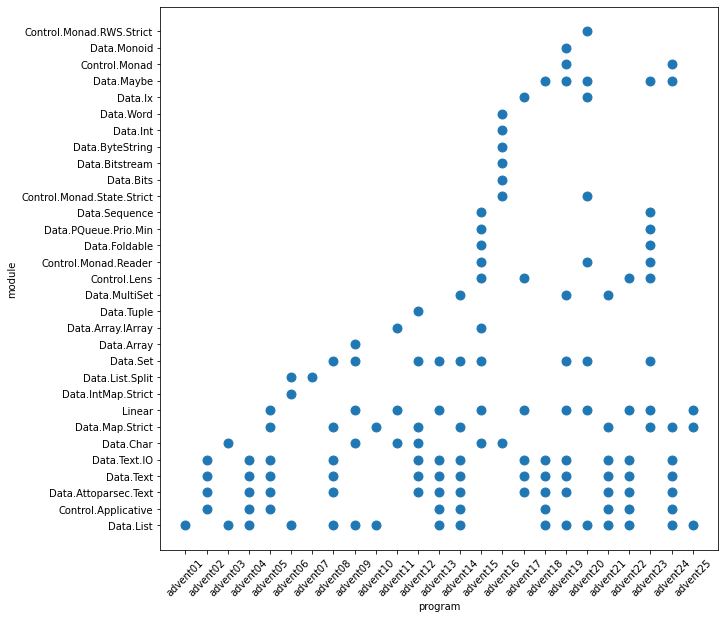

In [221]:
imports_scatter.plot.scatter(x='program', y='module', s=80, rot=45, figsize=(10, 10))

In [222]:
imports_df.columns.size

31

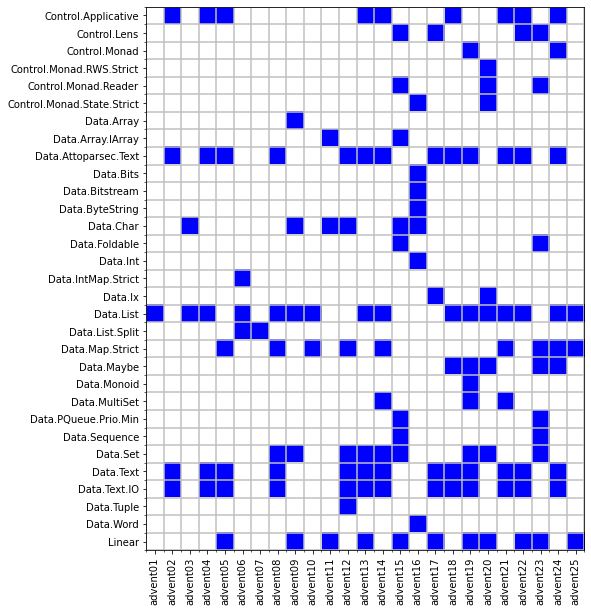

In [223]:
cmap = mpl.colors.ListedColormap(['white', 'blue'])

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(imports_df.to_numpy().T, cmap=cmap)
plt.xticks(range(imports_df.index.size), labels=imports_df.index.values, rotation=90);
plt.yticks(range(imports_df.columns.size), labels=imports_df.columns.values);

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.grid(which='minor', axis='both', linestyle='-', color='silver', linewidth=1.5);
plt.savefig('imports.png');

In [224]:
import matplotlib as mpl
mpl.__version__

'3.4.2'